1000
1000


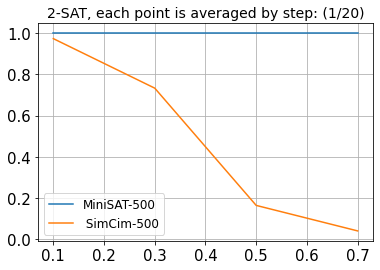

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


df100 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_1000/logs_logs__1000.csv', names=['M','alfa','y_hat','y_acc', 'TIME'], sep=',').sort_values(['alfa'])[0:1000]
df50 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_500/logs_logs__500.csv', names=['M','alfa','y_hat','y_acc', 'TIME'], sep=',').sort_values(['alfa'])[0:1000]

print(len(df100))
print(len(df50))


bins = np.arange(0, 2.1, 0.20)

df50['bins'] = pd.cut(df50.alfa, bins) 
df100['bins'] = pd.cut(df100.alfa, bins) 


ss_acc = df50.groupby('bins')['y_acc'].agg(['sum', 'count'])
ss_hat = df50.groupby('bins')['y_hat'].agg(['sum', 'count'])

ss_acc_100 =  df100.groupby('bins')['y_acc'].agg(['sum', 'count'])
ss_hat_100 =  df100.groupby('bins')['y_hat'].agg(['sum', 'count'])


y = [x.mid for x in ss_acc.index.values]


plt.title('2-SAT, each point is averaged by step: (1/20)', fontsize=14)
plt.plot(y, ss_acc['sum']/ss_acc['count'], "-",label='MiniSAT-500')
plt.plot(y, ss_hat['sum']/ss_hat['count'], "-",label=' SimCim-500')
#plt.plot(y, ss_acc_100['sum']/ss_acc_100['count'], "-", label='MiniSAT-1000')
#plt.plot(y, ss_hat_100['sum']/ss_hat_100['count'], "-", label=' SimCim-1000')


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid()
plt.legend(fontsize=12)
plt.show()


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df3 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/logs_logs__50(8).csv', names=['M','alfa','pycosat_res','wq_result', 'dw_result', 'y_acc', 'TIME'], sep=',').sort_values(['alfa'])


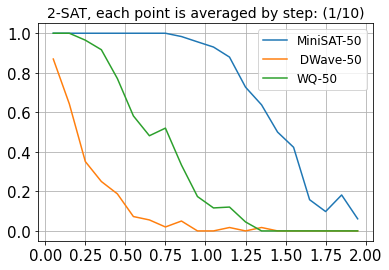

In [ ]:
bins = np.arange(0, 2.1, 0.10)

df3['bins'] = pd.cut(df3.alfa, bins) 


ss_acc = df3.groupby('bins')['y_acc'].agg(['sum', 'count'])
ss_dw_hat = df3.groupby('bins')['dw_result'].agg(['sum', 'count'])
ss_wq_hat = df3.groupby('bins')['wq_result'].agg(['sum', 'count'])

y = [x.mid for x in ss_acc.index.values]


plt.title('2-SAT, each point is averaged by step: (1/10)', fontsize=14)
plt.plot(y, ss_acc['sum']/ss_acc['count'], "-",label='MiniSAT-50')
plt.plot(y, ss_dw_hat['sum']/ss_dw_hat['count'], "-",label=' DWave-50')
plt.plot(y, ss_wq_hat['sum']/ss_wq_hat['count'], "-", label='WQ-50')


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid()
plt.legend(fontsize=12)
plt.show()


In [ ]:
len(df3['alfa'])

1001

In [ ]:
def accuracy(x, y):
  return sum(1 for a,b in zip(x,y) if a == b) / len(x)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

TP, FP, TN, FN = perf_measure(df3['y_acc'], df3['dw_result'])

array = [[TP, FP], [FN, TN]]
df_cm = pd.DataFrame(array, index = [i for i in ["Y_hat=1","Y_hat=0"]],
                  columns = [i for i in ["Y_acc=1", "Y_acc=0"]])
ax = plt.axes()
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16}) # font size
ax.set_title('SAT-100 D-Wave')
plt.show()

In [ ]:
import collections

ConfusionMatrix = collections.namedtuple('ConfusionMatrix', 'name age gender')

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    
    return (TP, FP, TN, FN)

